# 

## Install package

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
import torch
from torch.utils.data import Subset
import torch.nn as nn

import wandb

import src
import importlib
from src import *

importlib.reload(src)

<module 'src' from '/Users/typeorigin/PythonProjects/FReLU-torch/src/__init__.py'>

In [3]:
device = 'cpu'
# Check if MPS is supported and available
if torch.backends.mps.is_available():
    print("MPS is available on this device.")
    device = torch.device("mps")  # Use MPS device
            # device = 'cpu'
else:
    print("MPS not available, using CPU instead.")
    device = torch.device("cpu")  # Fallback to CPU

MPS is available on this device.


In [13]:
wandb. init(mode="disabled")

In [154]:


exper_configs = {
        # Context
        'architecture': 'VGG11Net3D',
        'dataset': 'CIFAR10',

        'trainer_args': {
            'trainer': 'BasicTrainer',

            'clip_gradients': True,
            'max_gradients': 5,

            # Kfold
            'k_n': 2,

            # Optimizer
            'optimizer': 'SGD',
            'lr': 0.01,
            'momentum': 0.9,
            'epochs': 20,
            
            # 'optimizer': 'ADAM',
            # 'lr': 0.001,
            # 'momentum': 0.9,
            # 'weight_decay': 0.00005,
            # 'epochs': 50,

            # Use 20% of train dataset as validation
            'val_ratio': 0.2,

            # Dataset
            'batch_size': 500,
        },

        # Model params
        'model_args': {
            # Activation Function
            'af_name': 'LeakyADA',
            'af_params': {
                'alpha': 0.5,
                'leak': 0.01
            }
        }
    }




In [155]:
img_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

In [156]:
dataset_name = exper_configs['dataset']
if dataset_name == 'MINST':
    train = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=img_transforms)
    test = torchvision.datasets.MNIST(root='.', train=False, download=True, transform=img_transforms)
elif dataset_name == 'CIFAR10':
    train = torchvision.datasets.CIFAR10(root='.', train=True, download=True, transform=img_transforms)
    test = torchvision.datasets.CIFAR10(root='.', train=False, download=True, transform=img_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [157]:
trainer = BasicTrainer(exper_configs['architecture'], device, exper_configs['trainer_args'])

Trainer configs: 

  arch_name: VGG11Net3D
  optimizer_name: SGD
  max_epoc: 20
  lr: 0.01
  momentum: 0.9
  weight_decay: 0.0


# Start Training

In [158]:
model_args = exper_configs['model_args']
trainer.train_model(model_args, train)


Train size (80.0%): 40000, Val size (20.0%): 10000
	Training set 80 has instances
	Test_loader set 20 has instances
VGG11Net3D initialized with params: 
 {'alpha': 0.5, 'leak': 0.01}
Model VGG11Net3D loaded, VGG11Net3D(
  (convs_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyADA(leak=0.01, alpha=0.5)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyADA(leak=0.01, alpha=0.5)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1

{'train_losses': [2.1287788048386576,
  1.6431415751576424,
  1.382928739488125,
  1.2003986924886703,
  1.0664662666618825,
  0.9463176004588604,
  0.8509833894670009,
  0.7701581947505474,
  0.6851403206586838,
  0.5942667555063963,
  0.5383497282862664,
  0.4707341928035021,
  0.4031831033527851,
  0.36029103957116604,
  0.32421752959489825,
  0.26635441593825815,
  0.24841787423938513,
  0.21827750895172357,
  0.18635294279083608,
  0.16831674175336958],
 'val_losses': [2.0044864892959593,
  1.9284984350204468,
  1.3059708654880524,
  1.3404418051242828,
  1.1832702338695527,
  1.3200978934764862,
  1.0423376858234406,
  1.4547173857688904,
  1.2096630573272704,
  1.8541016697883606,
  1.3905055284500123,
  1.103425893187523,
  1.0804421037435532,
  1.0407180577516555,
  1.5370698153972626,
  1.3477886080741883,
  1.139292550086975,
  1.3354280471801758,
  1.237307745218277,
  1.632235723733902],
 'train_acc': [tensor(0.1991),
  tensor(0.3687),
  tensor(0.4810),
  tensor(0.5606),
 

In [159]:

trainer.test_model(test)


Test Loss: 1.63, Accuracy: 0.6369000673294067


{'test_loss': 1.6344910383224487, 'test_acc': tensor(0.6369)}

# Register hook

In [160]:
activations = []
def hook(model, input, output):
    activations.append(output)

VGG11Net(
  (convs_layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): FReLU(inplace=True, bias=(torch.Size([1])))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): FReLU(inplace=True, bias=(torch.Size([1])))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): FReLU(inplace=True, bias=(torch.Size([1])))
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine

In [161]:
model = trainer.get_model()
model.eval()
#

VGG11Net3D(
  (convs_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyADA(leak=0.01, alpha=0.5)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyADA(leak=0.01, alpha=0.5)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyADA(leak=0.01, alpha=0.5)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [162]:
print(model.convs_layers[2])

LeakyADA(leak=0.01, alpha=0.5)


In [163]:
# First Activation Output
hook1 = model.convs_layers[2].register_forward_hook(hook)

# Last Activation Output
hook_last = model.convs_layers[27].register_forward_hook(hook)


In [39]:
# hook1.remove()
#hook_last.remove()

## Plot Features

In [164]:
img = train[0][0]
label = train[0][1]
print(img)
print(label)

img = img.to(device)


tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

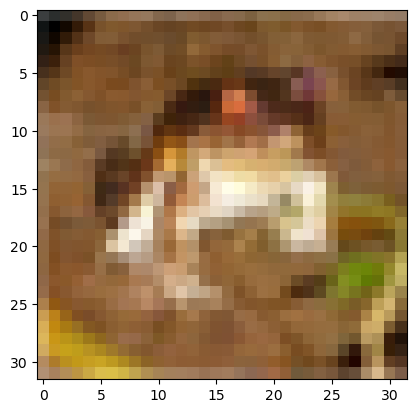

In [91]:
img_show = img.permute(1, 2, 0)
plt.imshow(img_show.cpu().detach().numpy())

In [165]:
input_batch = img.unsqueeze(0)
input_batch = input_batch.to(device)
print(input_batch.shape)

torch.Size([1, 3, 32, 32])


In [167]:
predict = model(input_batch)

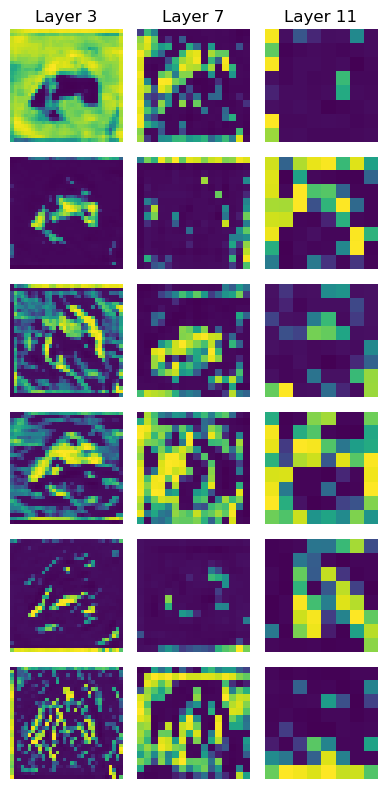

In [168]:
first_feature_maps = activations[0]
third_feature_maps = activations[3]
fifth_feature_maps = activations[5]

# Number of feature maps to display per layer
num_maps = 6

# Set up figure and axes (3 rows for the first three feature maps, 3 columns for three layers)
fig, axes = plt.subplots(num_maps, 3, figsize=(4, 8))  # rows, columns

# Ensure we have enough feature maps to display
num_first_maps = min(first_feature_maps.shape[1], num_maps)
num_third_maps = min(third_feature_maps.shape[1], num_maps)
num_fifth_maps = min(fifth_feature_maps.shape[1], num_maps)

for i in range(num_maps):
    
    #     
    # if i == 1:
    #         axes[i, 1].set_title(f"Layer 7")
    # 
    # if i == 11:
    #     axes[i, 2].set_title(f"Layer 11")
    #     
        
    if i < num_first_maps:
        if i == 0 :
            axes[i, 0].set_title(f"Layer 3")
        axes[i, 0].imshow(first_feature_maps[0][i].cpu().detach().numpy())
        
        axes[i, 0].axis('off')

    if i < num_third_maps:
        if i == 0 :
            axes[i, 1].set_title(f"Layer 7")
        axes[i, 1].imshow(third_feature_maps[0][i].cpu().detach().numpy())
        
        axes[i, 1].axis('off')

    if i < num_fifth_maps:
        if i == 0 :
            axes[i, 2].set_title(f"Layer 11")
        axes[i, 2].imshow(fifth_feature_maps[0][i].cpu().detach().numpy())
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

20
first_feature_maps.shape: torch.Size([1, 64, 32, 32])
third_feature_maps.shape: torch.Size([1, 128, 16, 16])
last_feature_maps.shape: torch.Size([1, 256, 8, 8])
torch.Size([64, 32, 32])


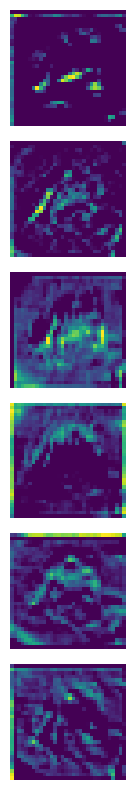

In [46]:
print(len(activations))

first_feature_maps = activations[0]
third_feature_maps = activations[3]
fifth_feature_maps = activations[5]

print(f'first_feature_maps.shape: {first_feature_maps.shape}')
print(f'third_feature_maps.shape: {third_feature_maps.shape}')
print(f'last_feature_maps.shape: {fifth_feature_maps.shape}')


image_feature_maps = first_feature_maps[0] # Batch 0
print(image_feature_maps.shape)
fig, axes = plt.subplots(6, 1, figsize=(8, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.imshow(image_feature_maps[i].cpu().detach().numpy())
    ax.axis('off')
plt.tight_layout()
plt.show()